In [ ]:
# FUTURE_DS_02 - Customer Support Ticket Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [ ]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

In [ ]:
df['Ticket Description'] = df['Ticket Description'].fillna("")
df['Ticket Type'] = df['Ticket Type'].fillna("Unknown")
df['Ticket Priority'] = df['Ticket Priority'].fillna("Medium")
df['Ticket Status'] = df['Ticket Status'].fillna("Open")
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(0)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

def clean_text(text):

    text = re.sub(r"{.*?}", "", text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    return text.lower()

if 'df' in globals():
    df['cleaned_text'] = df['Ticket Description'].apply(clean_text)
else:
    print("DataFrame 'df' not found. Please ensure previous cells were executed.")

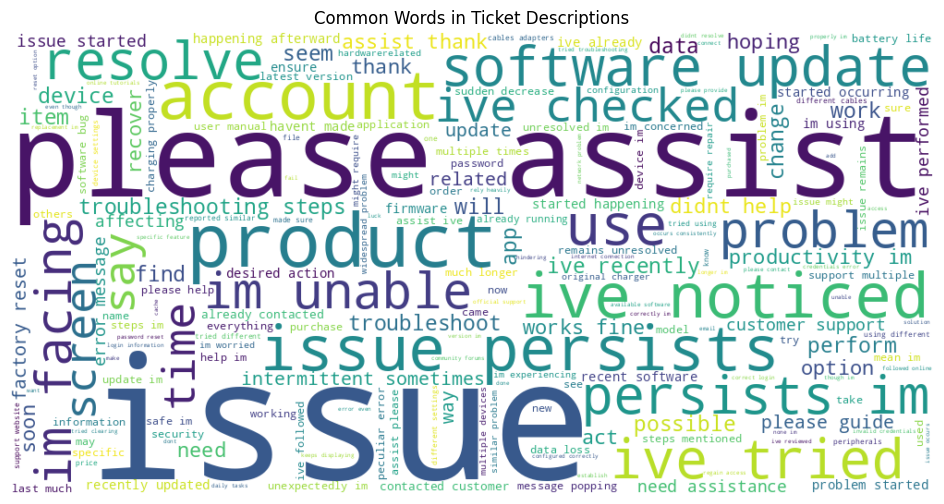

In [ ]:
all_words = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Ticket Descriptions")
plt.show()


<ipython-input-17-32f868860f9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Ticket Type', order=df['Ticket Type'].value_counts().head(10).index, palette="crest")


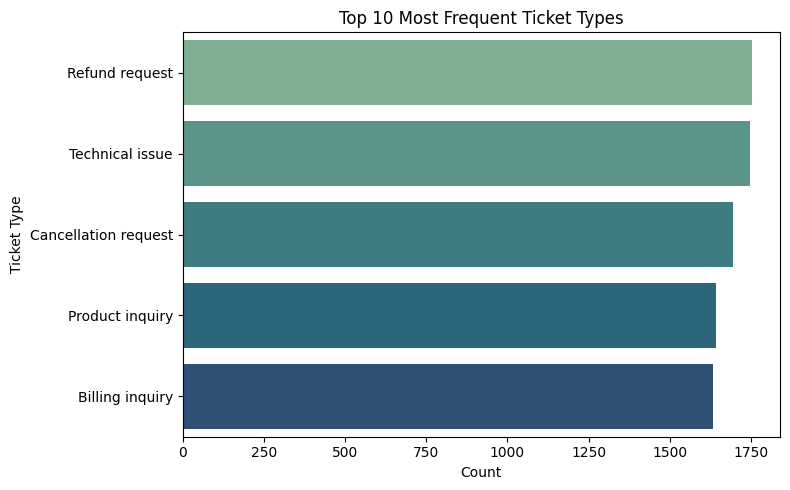

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Ticket Type', order=df['Ticket Type'].value_counts().head(10).index, palette="crest")
plt.title("Top 10 Most Frequent Ticket Types")
plt.xlabel("Count")
plt.ylabel("Ticket Type")
plt.tight_layout()
plt.show()

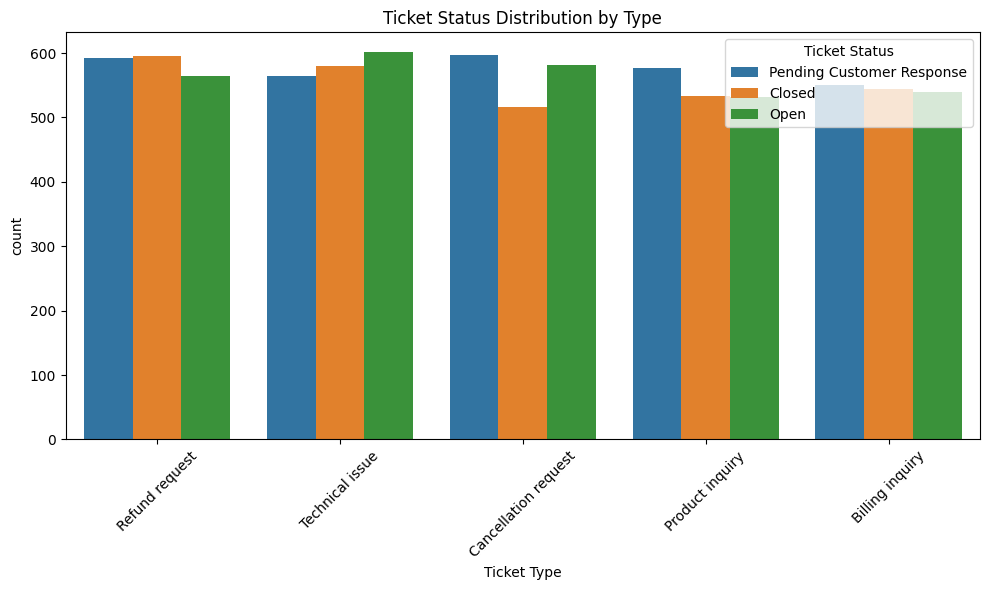

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ticket Type', hue='Ticket Status', order=df['Ticket Type'].value_counts().head(5).index)
plt.title("Ticket Status Distribution by Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Resolution Hours'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600
df['Resolution Hours'] = df['Resolution Hours'].fillna(0)

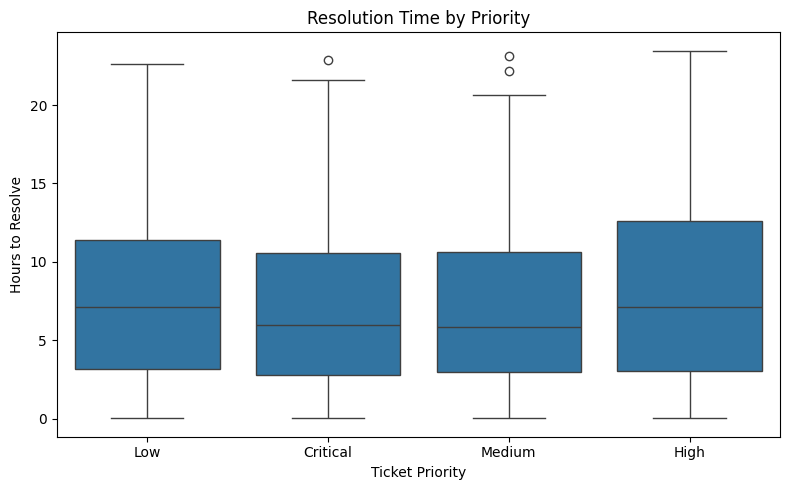

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['Resolution Hours'] > 0], x='Ticket Priority', y='Resolution Hours')
plt.title("Resolution Time by Priority")
plt.ylabel("Hours to Resolve")
plt.tight_layout()
plt.show()

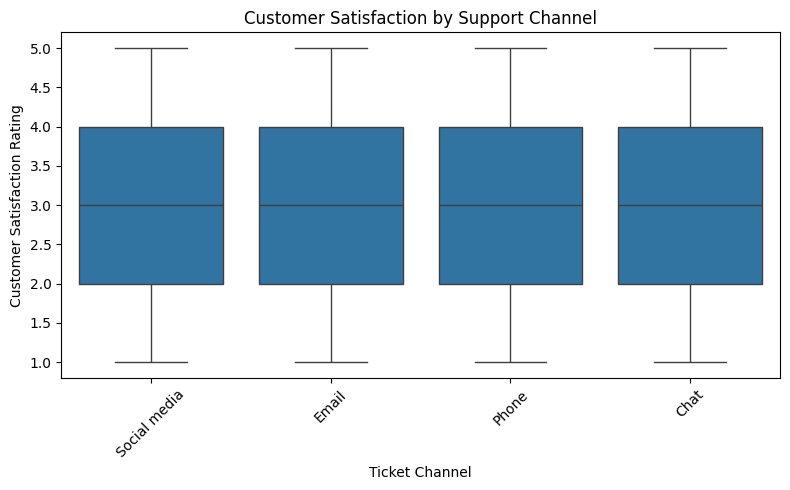

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['Customer Satisfaction Rating'] > 0], x='Ticket Channel', y='Customer Satisfaction Rating')
plt.title("Customer Satisfaction by Support Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("processed_customer_tickets.csv", index=False)
files.download("processed_customer_tickets.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>